In [1]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from brokenaxes import brokenaxes
import seaborn as sns

In [2]:
file_path = ('/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Zeta_Plots/022324_DLSZeta_serum_gradientcopoly_NP1,5,7.5,10_pDNA50to10.xlsx')
sheet_name = "Sheet1"  
df_zeta = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
# saving variables for plotting
polymer = df_zeta['Polymer'][::-1]
zeta = df_zeta['Zeta Potential'][::-1]
stdev = df_zeta['Stdev'][::-1]

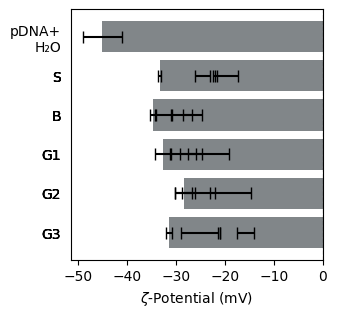

In [4]:
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

plt.barh(polymer, zeta, xerr=stdev, capsize = 4, color=color_gray)

plt.yticks(df_zeta['Polymer'], size=10)
plt.xticks(size=10)
plt.xlabel(r'$\zeta$-Potential (mV)', size=10)
plt.tick_params(left=False)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)

plt.show()

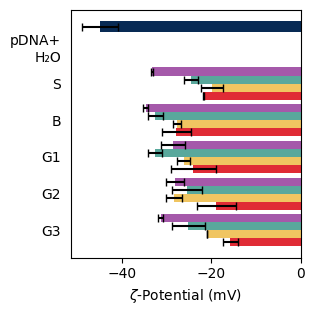

In [5]:
polymer_order = ['pDNA+\nH₂O', 'S', 'B', 'G1', 'G2', 'G3']
df_zeta['Polymer'] = pd.Categorical(df_zeta['Polymer'], categories=polymer_order, ordered=True)
df_zeta_sorted = df_zeta.sort_values(by=['Polymer', 'N/P ratio'])

fig, ax = plt.subplots(figsize=(3.25, 3.25))
bar_width = 0.22  
larger_bar_width = 0.3
unique_polymers = df_zeta_sorted['Polymer'].unique()
unique_ratios = df_zeta_sorted['N/P ratio'].unique()
positions = np.arange(len(polymer_order))  

colors = {
    '0.0': '#082a54',   
    '1.0': '#a559aa',   
    '5.0': '#59a89c',   
    '7.5': '#f0c561',   
    '10.0': '#e02b35'   
}

legend_dict = {}

for j, polymer in enumerate(polymer_order):
    for i, ratio in enumerate(unique_ratios):
        polymer_data = df_zeta_sorted[(df_zeta_sorted['Polymer'] == polymer) & (df_zeta_sorted['N/P ratio'] == ratio)]

        if not polymer_data.empty:
            position = positions[j] - bar_width * (len(unique_ratios) / 2 - i)
            color = colors[str(ratio)]
            bar_height = larger_bar_width if polymer == 'pDNA+\nH₂O' else bar_width
            bar = ax.barh(position, polymer_data['Zeta Potential'].mean(), xerr=polymer_data['Stdev'].mean(), 
                          color=color, height=bar_height, capsize=3)
            
            if ratio not in legend_dict:
                legend_dict[ratio] = bar

legend_handles = []
legend_labels = []

for ratio, bar_container in legend_dict.items():
    if len(bar_container.patches) > 0:
        first_bar = bar_container.patches[0]
        legend_handles.append(first_bar)
        
        if ratio == 7.5 or ratio == '7.5':
            legend_labels.append('7.5')
        else:
            legend_labels.append(str(int(float(ratio)))) 

ax.set_yticks(positions)
ax.set_yticklabels(polymer_order)
ax.invert_yaxis() 
ax.set_xlabel(r'$\zeta$-Potential (mV)')
#ax.legend(handles=legend_handles, labels=legend_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor=(1, 0.75))
ax.tick_params(axis='y', which='both', left=False)  

plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()